## Deliverable 2. Create a Customer Travel Destinations Map.

In [1]:
# Dependencies and Setup
import pandas as pd
import requests
import gmaps

# Import API key
from config import g_key

# Configure gmaps API key
gmaps.configure(api_key=g_key)

In [2]:
# 1. Import the WeatherPy_database.csv file. 
city_data_df = pd.read_csv("Weather_Database/WeatherPy_database.csv")
city_data_df.head()

,City_ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,0,Hermanus,ZA,-34.4187,19.2345,72.81,70,39,6.80,scattered clouds
1,1,Ushuaia,AR,-54.8000,-68.3000,42.46,56,100,17.27,overcast clouds
2,2,Alizai,PK,33.5383,70.3462,90.88,21,65,16.93,broken clouds
3,3,Rikitea,PF,-23.1203,-134.9692,77.54,74,87,15.17,overcast clouds
4,4,Shizunai,JP,42.3339,142.3669,45.45,77,77,13.13,broken clouds


In [3]:
# 2. Prompt the user to enter minimum and maximum temperature criteria 
#ask the customer to add a min and max temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 70
What is the maximum temperature you would like for your trip? 90


In [4]:
# 3. Filter the city_data_df DataFrame using the input statements to create a new DataFrame using the loc method.
clean_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & 
                                       (city_data_df["Max Temp"] >= min_temp)]
clean_df.head(10)

,City_ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,0,Hermanus,ZA,-34.4187,19.2345,72.81,70,39,6.80,scattered clouds
3,3,Rikitea,PF,-23.1203,-134.9692,77.54,74,87,15.17,overcast clouds
5,5,Sola,VU,-13.8833,167.5500,75.87,100,20,0.00,few clouds
10,10,Georgetown,MY,5.4112,100.3354,87.75,70,20,5.75,moderate rain
19,19,Bengkulu,ID,-3.8004,102.2655,81.52,83,73,4.50,light rain
20,20,Sijunjung,ID,-0.6876,100.9537,84.51,69,100,2.64,light rain
23,23,Auki,SB,-8.7676,160.7034,78.44,83,81,3.62,light rain
26,26,Bambous Virieux,MU,-20.3428,57.7575,83.21,78,40,11.50,scattered clouds
29,29,Cartagena,CO,10.3997,-75.5144,80.22,94,75,3.44,haze
31,31,Victoria,HK,22.2855,114.1577,78.96,57,86,5.99,overcast clouds


In [5]:
# 4a. Determine if there are any empty rows.
clean_df.count()

City_ID                287
City                   287
Country                282
Lat                    287
Lng                    287
Max Temp               287
Humidity               287
Cloudiness             287
Wind Speed             287
Current Description    287
dtype: int64

In [6]:
# 4b. Drop any empty rows and create a new DataFrame that doesn’t have empty rows.
clean_df = clean_df.dropna()

In [7]:
clean_df.count()

City_ID                282
City                   282
Country                282
Lat                    282
Lng                    282
Max Temp               282
Humidity               282
Cloudiness             282
Wind Speed             282
Current Description    282
dtype: int64

In [8]:
# 5a. Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = clean_df[["City", "Country", "Max Temp", "Current Description", "Lat", "Lng"]].copy()

# 5b. Create a new column "Hotel Name"
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Current Description,Lat,Lng,Hotel Name
0,Hermanus,ZA,72.81,scattered clouds,-34.4187,19.2345,
3,Rikitea,PF,77.54,overcast clouds,-23.1203,-134.9692,
5,Sola,VU,75.87,few clouds,-13.8833,167.5500,
10,Georgetown,MY,87.75,moderate rain,5.4112,100.3354,
19,Bengkulu,ID,81.52,light rain,-3.8004,102.2655,
20,Sijunjung,ID,84.51,light rain,-0.6876,100.9537,
23,Auki,SB,78.44,light rain,-8.7676,160.7034,
26,Bambous Virieux,MU,83.21,scattered clouds,-20.3428,57.7575,
29,Cartagena,CO,80.22,haze,10.3997,-75.5144,
31,Victoria,HK,78.96,overcast clouds,22.2855,114.1577,


In [9]:
# 6a. Set parameters to search for hotels with 5000 meters.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

# 6b. Iterate through the hotel DataFrame.
for index, row in hotel_df.iterrows():
    # 6c. Get latitude and longitude from DataFrame
    lat = row["Lat"]
    lng = row["Lng"]
    
    params["location"] = f"{lat},{lng}"
    # 6d. Set up the base URL for the Google Directions API to get JSON data.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # 6e. Make request and retrieve the JSON data from the search. 
    hotels = requests.get(base_url, params=params).json()
    
    # 6f. Get the first hotel from the results and store the name, if a hotel isn't found skip the city.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        continue
    

In [10]:
# 7. Drop the rows where there is no Hotel Name.
clean_hotel_df = hotel_df.dropna()
clean_hotel_df.count()

City                   282
Country                282
Max Temp               282
Current Description    282
Lat                    282
Lng                    282
Hotel Name             282
dtype: int64

In [11]:
clean_hotel_df = clean_hotel_df.loc[((clean_hotel_df['Hotel Name'].str.len())>= 1)]
clean_hotel_df

,City,Country,Max Temp,Current Description,Lat,Lng,Hotel Name
0,Hermanus,ZA,72.81,scattered clouds,-34.4187,19.2345,Misty Waves Boutique Hotel
3,Rikitea,PF,77.54,overcast clouds,-23.1203,-134.9692,People ThankYou
5,Sola,VU,75.87,few clouds,-13.8833,167.5500,Leumerus Bungalows
10,Georgetown,MY,87.75,moderate rain,5.4112,100.3354,Cititel Penang
19,Bengkulu,ID,81.52,light rain,-3.8004,102.2655,Grage Hotel Bengkulu
...,...,...,...,...,...,...,...
698,Kavaratti,IN,85.33,overcast clouds,10.5669,72.6420,Hotels in Lakshadweep Islands
702,Lockhart,US,73.44,clear sky,28.6194,-81.4426,Courtyard by Marriott Orlando Altamonte Spring...
709,Mizan Teferi,ET,74.98,light rain,6.9833,35.5833,Hotel Salayish - ሳላይሽ ሆቴል
712,Palembang,ID,82.49,scattered clouds,-2.9167,104.7458,ASTON Palembang Hotel & Conference Center


In [13]:
# 8a. Create the output File (CSV)
output_data_file = "C:/Users/Elissa/World_Weather_Analysis/Vacation_Search/WeatherPy_vacation.csv"
# 8b. Export the City_Data into a csv
clean_hotel_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# 9. Using the template add city name, the country code, the weather description and maximum temperature for the city.
info_box_template = """
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Current Weather</dt><dd>{Current Description} and {Max Temp} °F</dd>
</dl>
"""

# 10a. Get the data from each row and add it to the formatting template and store the data in a list.
hotel_info = [info_box_template.format(**row) for index, row in clean_hotel_df.iterrows()]

# 10b. Get the latitude and longitude from each row and store in a new DataFrame.
locations = clean_hotel_df[["Lat", "Lng"]]

In [15]:
# 11a. Add a marker layer for each city to the map. 
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.0)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(marker_layer)
# 11b. Display the figure
fig


Figure(layout=FigureLayout(height='420px'))

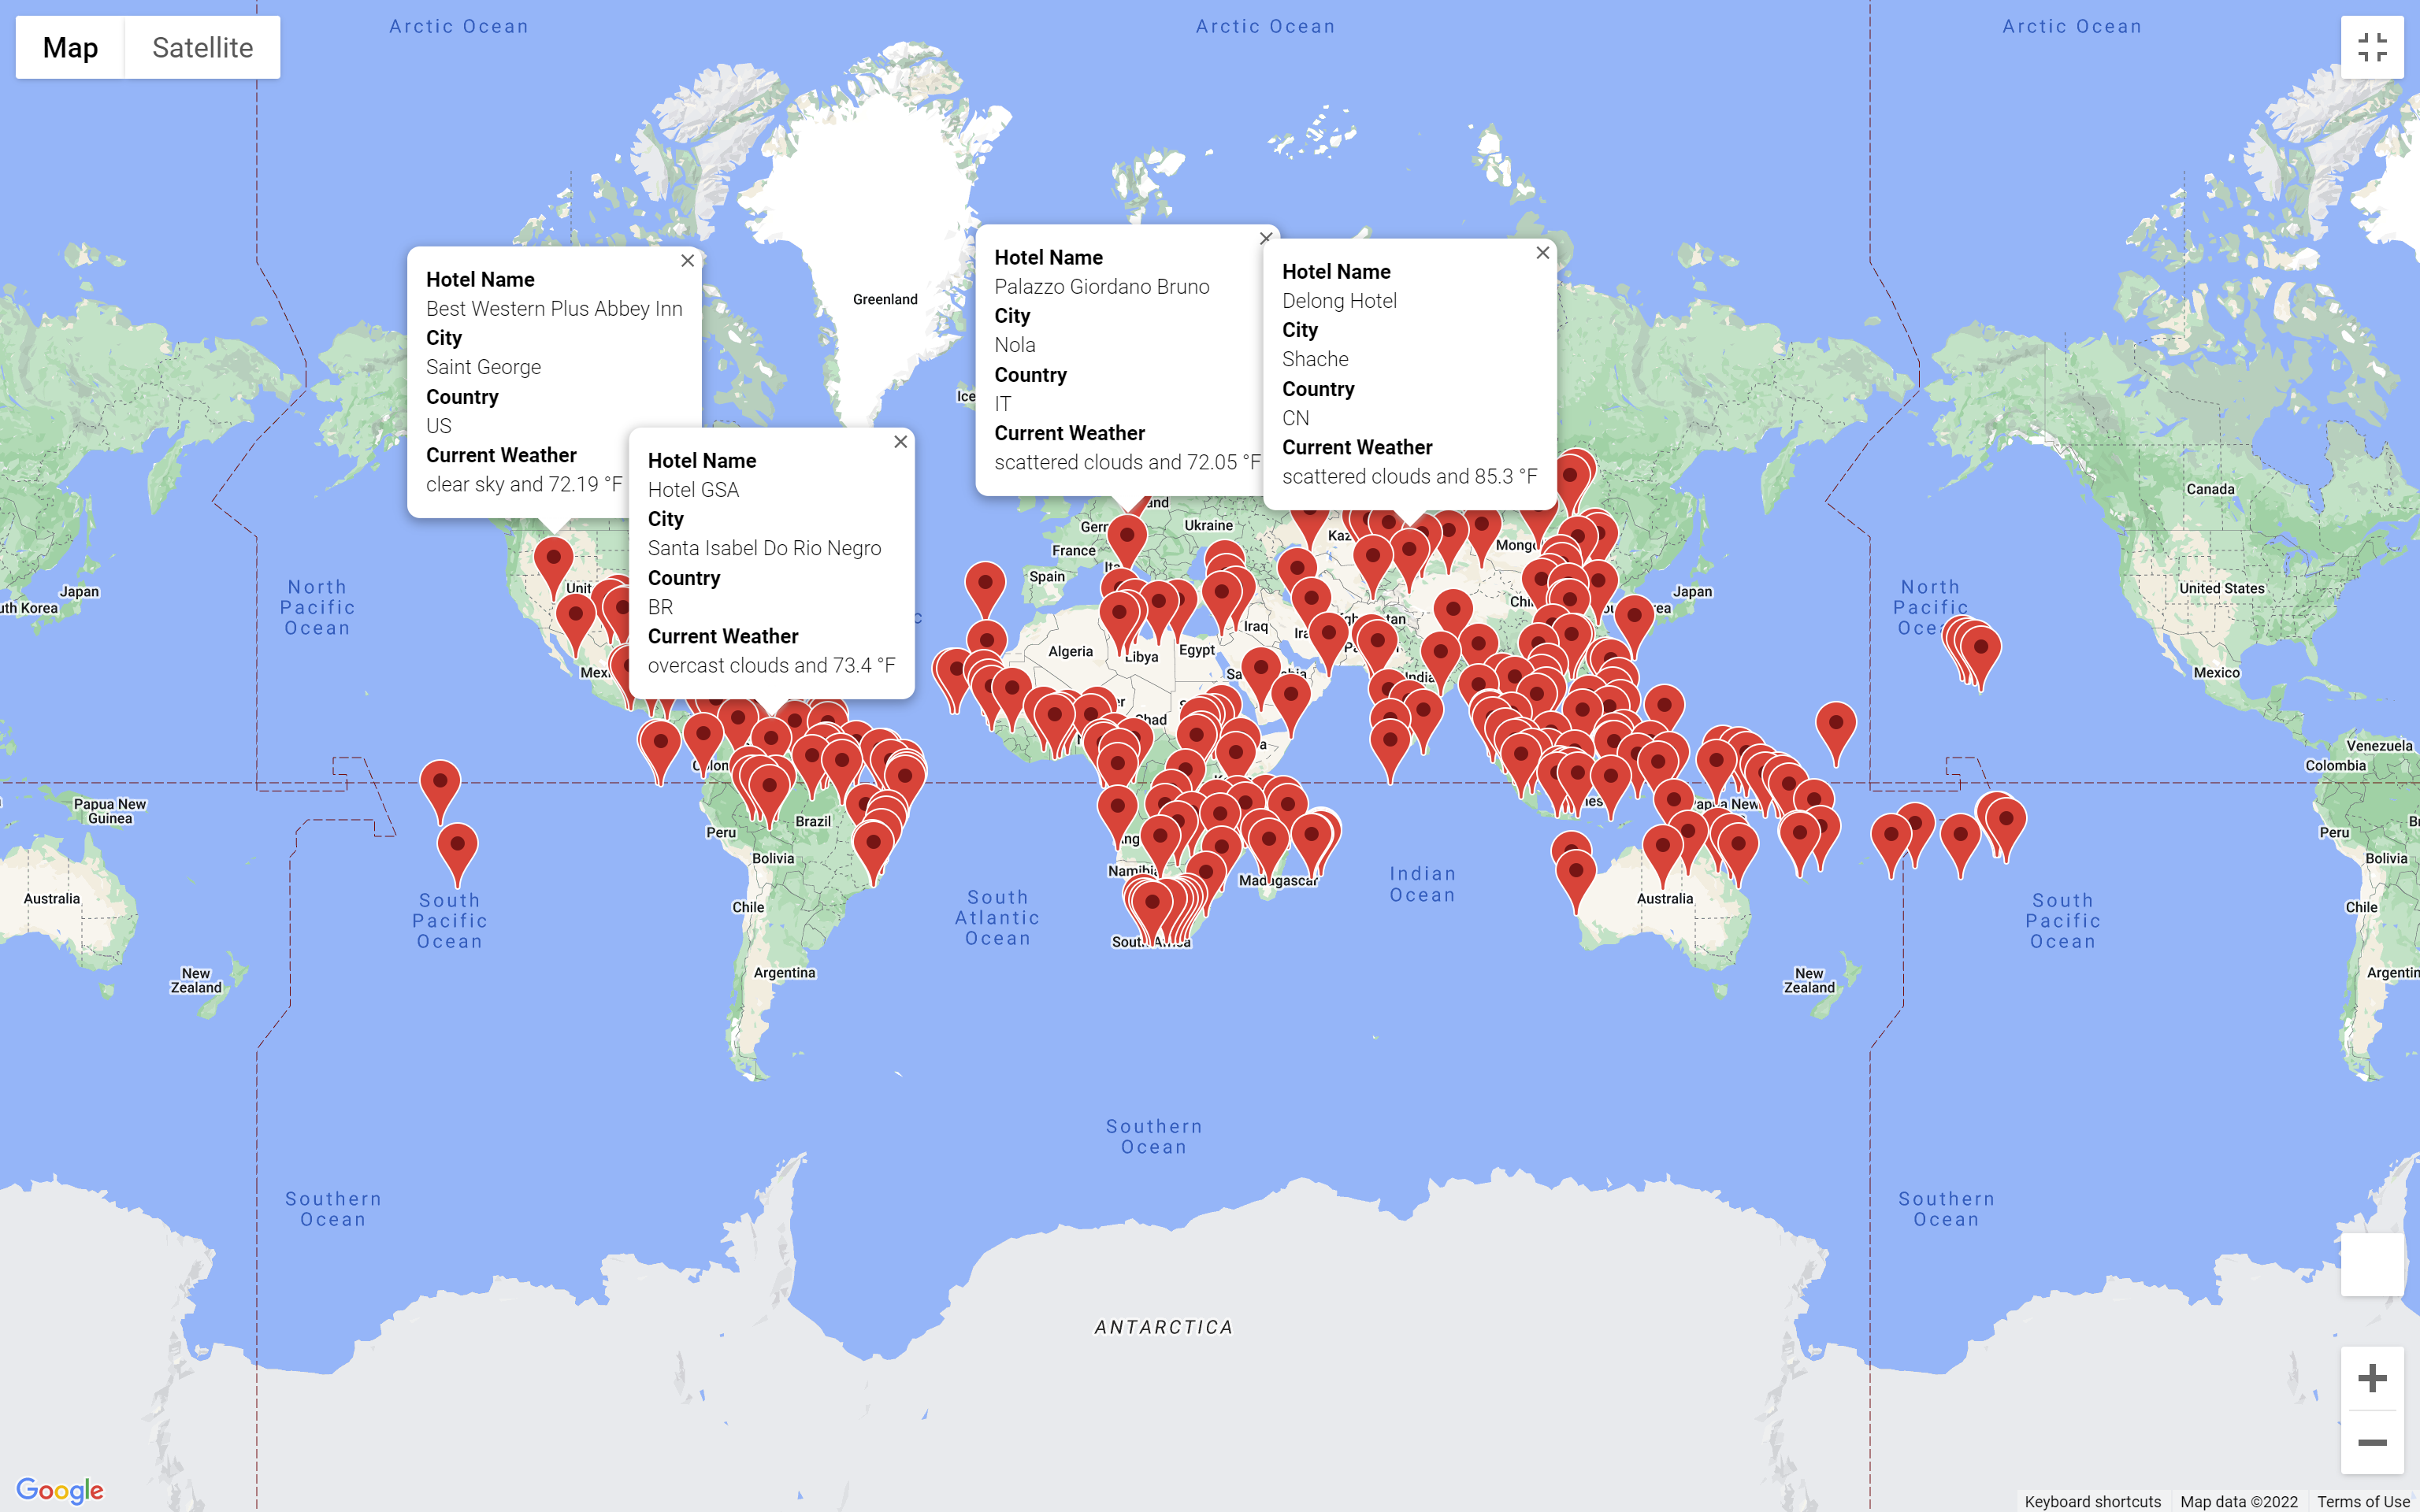